In [72]:
%matplotlib inline

import json
import os

from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import cluster
from sklearn import manifold
from sklearn import preprocessing
from scipy.spatial.distance import cdist
import numpy as np
import math
import time
import pandas as pd
from sklearn.neighbors.kde import KernelDensity

data = []
fileNames = []
fileSize = []

###############################################
# Read Documents
###############################################

for root, dirs, files in os.walk("wiki-docs-large"):
    for filePath in files:
        if filePath.endswith(".txt"):
            with open(os.path.join(root, filePath), 'r') as file:
                file_content = file.read()
                data.append(file_content)
                fileNames.append(filePath)
                fileSize.append(len(file_content))
                
[doc[:100] + '...' for doc in data]

['The 2010 United Nations Climate Change Conference was held in Cancn, Mexico, from 29 November to 10 ...',
 'The 2011 United Nations Climate Change Conference (COP17) was held in Durban, South Africa, from 28 ...',
 'An abrupt climate change occurs when the climate system is forced to transition to a new climate sta...',
 'In physics, absorption of electromagnetic radiation is the way in which the energy of a photon is ta...',
 'Attribution of recent climate change is the effort to scientifically ascertain mechanisms responsibl...',
 'Bangladesh ( ( listen) or ; Bengali:  Blda, pronounced [balade] ( listen), lit."The country of Benga...',
 'Sir Brian John Hoskins CBE FRS, (born 17 May 1945) is a British dynamical meteorologist and climatol...',
 'Not to be confused with- Calcification\nAuthorities differ on the meaning of calcination (also referr...',
 'Carbon dioxide removal (CDR) refers to a number of technologies, the objective of which is the large...',
 'A carbon tax is a tax lev

In [95]:
topics = [
    'talk.politics.guns', 
    'soc.religion.christian', 
    'comp.graphics', 
    'comp.windows.x', 
    'rec.sport.baseball', 
    'rec.sport.hockey', 
    'sci.space'
]

articles_per_topic = 200

data = []
fileNames = []
fileSize = []
group_labels = []

for topic_i, topic in enumerate(topics):
    for root, dirs, files in os.walk('20_newsgroup/{}'.format(topic)):
        for filePath in files[:articles_per_topic]:
            with open(os.path.join(root, filePath), 'r') as file:
                file_content = file.read()
                end_of_header = file_content.find('\n\n') + 2;
                article_content = file_content[end_of_header:]
                if len(article_content) > 1000:
                    data.append(article_content)
                    fileNames.append(topic)
                    group_labels.append(topic_i)
                    fileSize.append(len(file_content))
                
[doc[:100] + '...' for doc in data]

['hambidge@bms.com wrote:\n: In article <C4psoG.C6@magpie.linknet.com>, manes@magpie.linknet.com (Steve...',
 'Jim De Arras (jmd@cube.handheld.com) wrote:\n: > Last year the US suffered almost 10,000 wrongful or ...',
 'Steve Kao (k@hprnd.rose.hp.com) wrote:\n: Frank Crary posted:\n: : Sure, but the difference in per-cap...',
 '\n----------------------------------------------------------------------\nOpen letter by Dr. Paul H. B...',
 '\nThe ATF agent interviewed on "Street Stories" reported that the raid was\nill planned, and went ahea...',
 'manes@magpie.linknet.com (Steve Manes) writes:\n\n>hambidge@bms.com wrote:\n>: In article <C4psoG.C6@ma...',
 'In article <C4tsD1.1vA@news.cso.uiuc.edu> irvine@uxh.cso.uiuc.edu (Brent Irvine) writes:\n>In article...',
 '>In article <1993Mar28.180629.21574@mnemosyne.cs.du.edu> rcanders@nyx.cs.du.edu (Mr. Nice Guy) write...',
 '-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-\n Announcing. . . Announcing. . . Annou...',
 '-+-+-+-+-+-+-

In [96]:
###############################################
# Vectorize Documents
###############################################

vectorizer = feature_extraction.text.TfidfVectorizer(stop_words='english', max_features=1000, smooth_idf=True, sublinear_tf=False, min_df=1, max_df=1.0, ngram_range=(1,1))
#Hashing seems to run into issues when there are 2 identical documents
#vectorizer = feature_extraction.text.HashingVectorizer(n_features=2**17, stop_words='english', alternate_sign=False, norm='l2', binary=False, ngram_range=(2,2))

# don't load everything into memory with https://stackoverflow.com/questions/16453855/tfidfvectorizer-for-corpus-that-cannot-fit-in-memory
doc_vectors = vectorizer.fit_transform(data).todense()

terms = vectorizer.get_feature_names()

df = pd.DataFrame(doc_vectors, columns=terms, index=fileNames)

df

,00,000,01,02,03,04,05,10,100,11,...,xlib,xm,xt,xterm,xvoid,year,years,yes,york,young
talk.politics.guns,0.000000,0.403873,0.0,0.0,0.0,0.0,0.0,0.075433,0.187472,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.051838,0.000000
talk.politics.guns,0.000000,0.075556,0.0,0.0,0.0,0.0,0.0,0.028224,0.035072,0.049757,...,0.0,0.0,0.0,0.0,0.0,0.075673,0.000000,0.000000,0.019396,0.000000
talk.politics.guns,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.050689,0.000000,0.000000,0.077953,0.000000
talk.politics.guns,0.009822,0.047828,0.0,0.0,0.0,0.0,0.0,0.014293,0.035522,0.008399,...,0.0,0.0,0.0,0.0,0.0,0.038321,0.020819,0.000000,0.039289,0.009615
talk.politics.guns,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
talk.politics.guns,0.000000,0.331269,0.0,0.0,0.0,0.0,0.0,0.061872,0.153771,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.042519,0.000000
talk.politics.guns,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
talk.politics.guns,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
talk.politics.guns,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.015835,0.019677,0.018610,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
talk.politics.guns,0.026068,0.000000,0.0,0.0,0.0,0.0,0.0,0.037934,0.011785,0.022291,...,0.0,0.0,0.0,0.0,0.0,0.008476,0.018418,0.000000,0.000000,0.012759


In [97]:
cluster_alg = cluster.AffinityPropagation(preference=-10, damping=0.7)

cluster_alg.fit(doc_vectors);

order_centroids = cluster_alg.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(len(np.unique(cluster_alg.labels_))):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()
    docs_in_cluster = np.array(fileNames)[cluster_alg.labels_ == i][:3]
    for i in range(len(docs_in_cluster)):
        print('\t' + str(docs_in_cluster[i]))

Cluster 0: manes rate killed 000 handgun uk magpie linknet likely population
	talk.politics.guns
	talk.politics.guns
	talk.politics.guns
Cluster 1: revolver semi police cops auto hit shots shooting better armed
	talk.politics.guns
	talk.politics.guns
	talk.politics.guns
Cluster 2: guns gun problem control weapons criminals think rate kill situation
	talk.politics.guns
	talk.politics.guns
	talk.politics.guns
Cluster 3: faith god does christianity christ christian life bible heaven man
	talk.politics.guns
	talk.politics.guns
	talk.politics.guns
Cluster 4: god bible jesus truth human hand word written authors author
	talk.politics.guns
	soc.religion.christian
	soc.religion.christian
Cluster 5: window widget subject pixmap application xt xlib use answer screen
	talk.politics.guns
	comp.graphics
	comp.graphics
Cluster 6: lib xterm usr ___ x11r5 error build xt index input
	comp.graphics
	comp.windows.x
	comp.windows.x
Cluster 7: 1992 year games cal 22 wins division win right season
	talk.pol

In [88]:
colors = [20] * doc_vectors.shape[0]
colors[0] = 100;
plt.scatter(df['united'], df['climate'], c=colors, s=colors)
plt.show()

KeyError: 'climate'

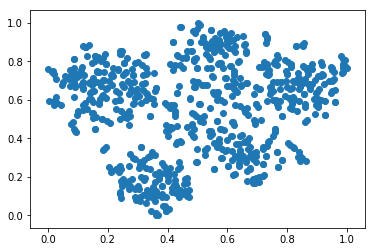

In [98]:
###############################################
# Reduce Dimensionality
###############################################
#https://distill.pub/2016/misread-tsne/

#dimension_reducer = decomposition.PCA(n_components=2)
#dimension_reducer = manifold.Isomap(10, eigen_solver='auto', n_components=2)
dimension_reducer = manifold.TSNE(perplexity=min(round(3 + doc_vectors.shape[0]/30), 50))
#dimension_reducer = decomposition.TruncatedSVD() # doesn't require dense matrix

doc_points = dimension_reducer.fit_transform(doc_vectors)

# dimension_reducer1 = decomposition.TruncatedSVD(n_components=100) # set tfidf features to 10000+
# dimension_reducer2 = manifold.TSNE(perplexity=min(round(3 + doc_vectors.shape[0]/10), 50))
# doc_vectors_reduced = dimension_reducer1.fit_transform(doc_vectors)
# doc_points = dimension_reducer2.fit_transform(doc_vectors_reduced)

doc_points = preprocessing.minmax_scale(doc_points)

plt.scatter(doc_points[:, 0], doc_points[:, 1])
plt.show()

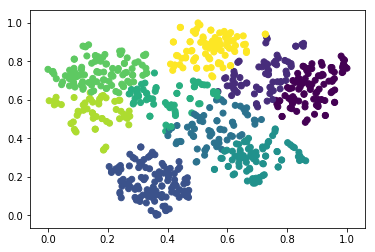

In [99]:
###############################################
# Assign Documents to Clusters
###############################################
#http://scikit-learn.org/stable/modules/clustering.html

def find_centers(points, point_labels):
    labels  = np.unique(point_labels)
    return {label: np.mean(points[point_labels==label], axis=0) for label in labels}

cluster_alg = cluster.AffinityPropagation(preference=-1, damping=0.7)

#cluster_alg = cluster.DBSCAN(eps=0.06, min_samples=round(doc_points.shape[0] / 40))

#cluster_alg = cluster.MeanShift(bin_seeding=True)

cluster_alg.fit(doc_points);

cluster_centers = find_centers(doc_points, cluster_alg.labels_)
#cluster_centers = cluster_alg.cluster_centers_

plt.scatter(doc_points[:, 0], doc_points[:, 1], c=cluster_alg.labels_);
plt.show()

In [100]:
###############################################
# Additional Metrics
###############################################

distances_from_center = np.array([])

for i, doc in enumerate(doc_points):
    center = cluster_centers[cluster_alg.labels_[i]]
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(doc, center)]))
    distances_from_center = np.append(distances_from_center, distance)

if distances_from_center.max() > 0:
    distances_from_center = distances_from_center/distances_from_center.max()

file_size_as_features = np.array(fileSize).reshape(-2, 1)
rel_file_size = preprocessing.QuantileTransformer(output_distribution='uniform').fit_transform(file_size_as_features)[:,0]

kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(doc_points)
density_at_doc = kde.score_samples(doc_points)
density_at_doc = preprocessing.MinMaxScaler().fit_transform(density_at_doc.reshape(-1, 1))[:,0]

###############################################
# Serialize
###############################################


docs = [{
    'x': float(doc[0]), 
    'y': float(doc[1]),
    'cluster': int(cluster_alg.labels_[i]),
    'name': fileNames[i], 
    'size': rel_file_size[i],
    'density': density_at_doc[i],
    'distanceFromCenter': distances_from_center[i],
    'group': group_labels[i]
} for i, doc in enumerate(doc_points)]

with open('docs.json', 'w') as outfile:
    json.dump(docs, outfile)